In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [29]:
data_set = "/content/drive/My Drive/animals"

categories=os.listdir(data_set)
print(categories)

['cats', 'panda', 'dogs']


In [30]:
train_data = []

# Loop through each category
for c in categories:
    path = os.path.join(data_set, c)
    class_index = categories.index(c)
    print(f"Processing category: {c} (Index: {class_index})")

    # Loop through each image in the category with a progress bar
    for img in tqdm(os.listdir(path), desc=f"Processing images in {c}", leave=True):
        try:
            # Attempt to load the image in grayscale and resize it
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                raise ValueError(f"Image {img} could not be read or is corrupted.")

            img_array = cv2.resize(img_array, (256, 256))
            train_data.append([img_array, class_index])

        except Exception as e:
            print(f"Skipping corrupted image {img} in {c}: {e}")

print(f"\nTotal images processed: {len(train_data)}")


Processing category: cats (Index: 0)


Processing images in cats: 100%|██████████| 1000/1000 [00:27<00:00, 35.97it/s]


Processing category: panda (Index: 1)


Processing images in panda: 100%|██████████| 1000/1000 [00:29<00:00, 34.39it/s]


Processing category: dogs (Index: 2)


Processing images in dogs: 100%|██████████| 1000/1000 [00:20<00:00, 48.52it/s]


Total images processed: 3000


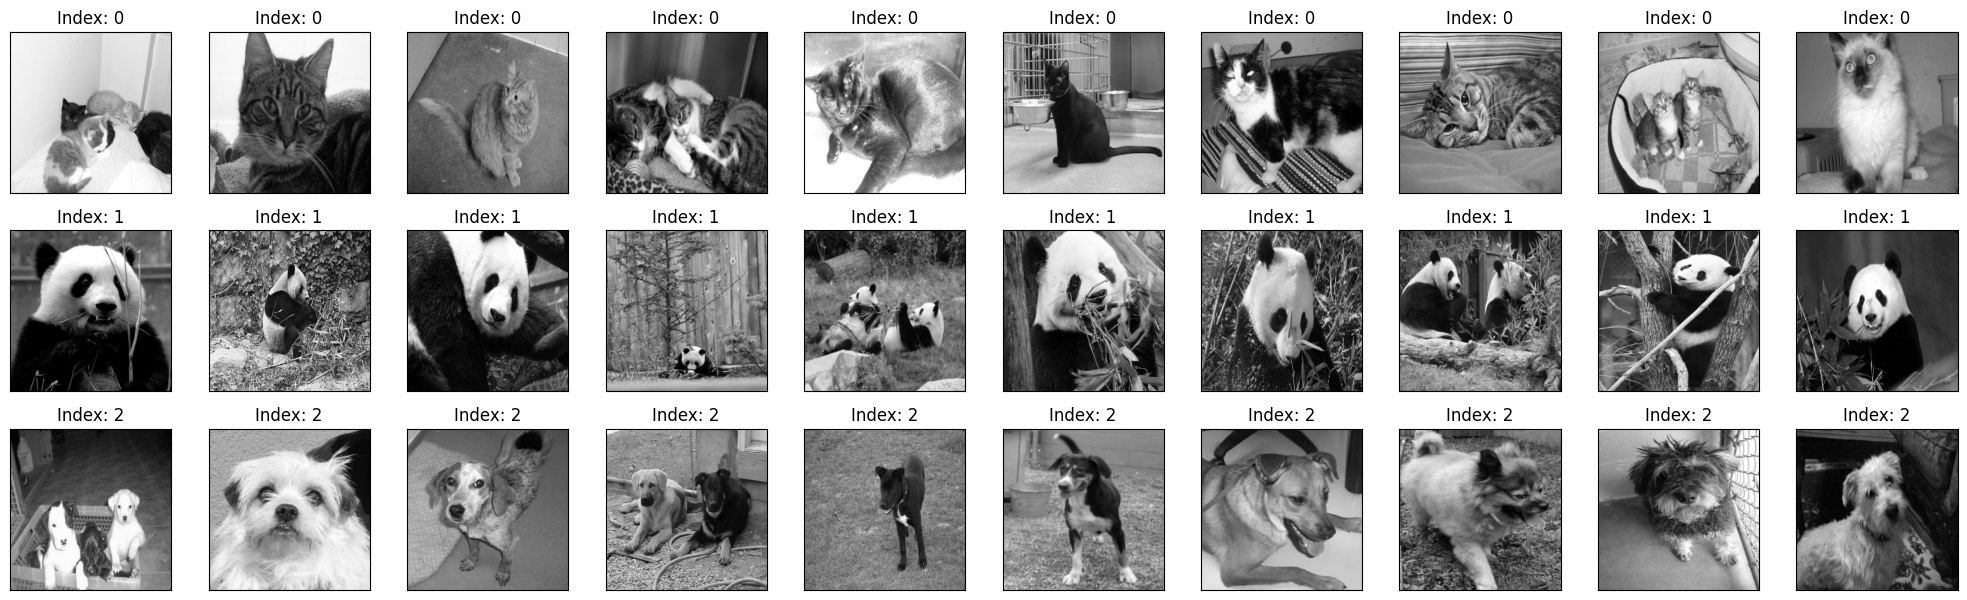

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Adjust the figure size for a 10x10 grid
i = 20  # Starting index

for n in range(10):
    for e in range(10):
        # Calculate the image index based on the loop
        img_index = i + n * 1000 + e
        if img_index < len(train_data):  # Ensure you don't go beyond the data size
            plt.subplot(10, 10, n * 10 + e + 1)  # (10 rows, 10 columns, current position)
            plt.imshow(train_data[img_index][0], cmap="gray")  # Display image in grayscale
            plt.xticks([])  # Hide x-axis ticks
            plt.yticks([])  # Hide y-axis ticks
            plt.title(f"Index: {train_data[img_index][1]}")  # Optionally add the index as title for each image

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [33]:
# Shuffle the train_data in place
random.shuffle(train_data)

In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_data is already shuffled and contains 500 images.
# Shuffle the train_data first
random.shuffle(train_data)

# Split data into 5 folds
num_folds = 5
fold_size = len(train_data) // num_folds  # This should be 100 if you have 500 images

# Split the data into 5 folds
folds = [train_data[i * fold_size: (i + 1) * fold_size] for i in range(num_folds)]

# Manhattan distance function
def manhattan_distance(img1, img2):
    try:
        # Flatten the images to 1D vectors and calculate Manhattan distance
        return np.sum(np.abs(img1.flatten() - img2.flatten()))
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')  # Return a large value for corrupted images to ignore them

# List to store accuracies for each fold and each k value
accuracies = {k: [] for k in range(1, 6)}

# Perform 5-fold cross-validation for each k (from k=1 to k=5)
for fold_num in range(num_folds):
    # Define the validation fold (the current fold)
    validation_fold = folds[fold_num]

    # Combine the remaining 4 folds for training
    training_folds = [folds[i] for i in range(num_folds) if i != fold_num]
    training_data = [item for sublist in training_folds for item in sublist]

    print(f"Iteration {fold_num + 1}")  # Output iteration details

    # For each value of k (1, 2, 3, 4, 5), calculate the accuracy
    for k in range(1, 6):
        correct_predictions = 0
        total_predictions = len(validation_fold)

        for val_img, val_label in validation_fold:
            distances = []
            for train_img, train_label in training_data:
                try:
                    # Try calculating distance; skip if there's an error
                    distance = manhattan_distance(val_img, train_img)
                    distances.append((distance, train_label))
                except Exception as e:
                    print(f"Skipped a corrupted training image: {e}")

            if distances:
                # Sort the distances and get the labels of the k nearest neighbors
                distances.sort(key=lambda x: x[0])
                nearest_neighbors = [label for _, label in distances[:k]]

                # Majority vote for classification
                predicted_label = max(set(nearest_neighbors), key=nearest_neighbors.count)

                # Compare predicted label with true label
                if predicted_label == val_label:
                    correct_predictions += 1

        # Calculate accuracy for this fold and k value
        accuracy = correct_predictions / total_predictions * 100
        accuracies[k].append(accuracy)

        # Output the accuracy for the current fold and k value
        print(f"When k={k} ----> Accuracy = {accuracy:.2f}%")

    print("-" * 40)  # End of the iteration

# Now, select the **median point** for each iteration (fold)
median_points = []
for i in range(num_folds):
    # Get the accuracies for the current fold for each k (1, 2, 3, 4, 5)
    fold_accuracies = [accuracies[k][i] for k in range(1, 6)]
    # Find the median of the current fold's accuracies
    median_accuracy = np.median(fold_accuracies)
    median_points.append(median_accuracy)


Iteration 1
When k=1 ----> Accuracy = 40.33%
When k=2 ----> Accuracy = 40.17%
When k=3 ----> Accuracy = 39.17%
When k=4 ----> Accuracy = 38.33%
When k=5 ----> Accuracy = 38.00%
----------------------------------------
Iteration 2
When k=1 ----> Accuracy = 39.50%
When k=2 ----> Accuracy = 41.17%
When k=3 ----> Accuracy = 39.17%
When k=4 ----> Accuracy = 40.17%
When k=5 ----> Accuracy = 41.83%
----------------------------------------
Iteration 3
When k=1 ----> Accuracy = 36.17%
When k=2 ----> Accuracy = 38.33%
When k=3 ----> Accuracy = 37.50%
When k=4 ----> Accuracy = 41.00%
When k=5 ----> Accuracy = 41.83%
----------------------------------------
Iteration 4
When k=1 ----> Accuracy = 39.50%
When k=2 ----> Accuracy = 42.17%
When k=3 ----> Accuracy = 40.33%
When k=4 ----> Accuracy = 42.67%
When k=5 ----> Accuracy = 42.00%
----------------------------------------
Iteration 5
When k=1 ----> Accuracy = 34.67%
When k=2 ----> Accuracy = 38.00%
When k=3 ----> Accuracy = 39.00%
When k=4 ----> Ac

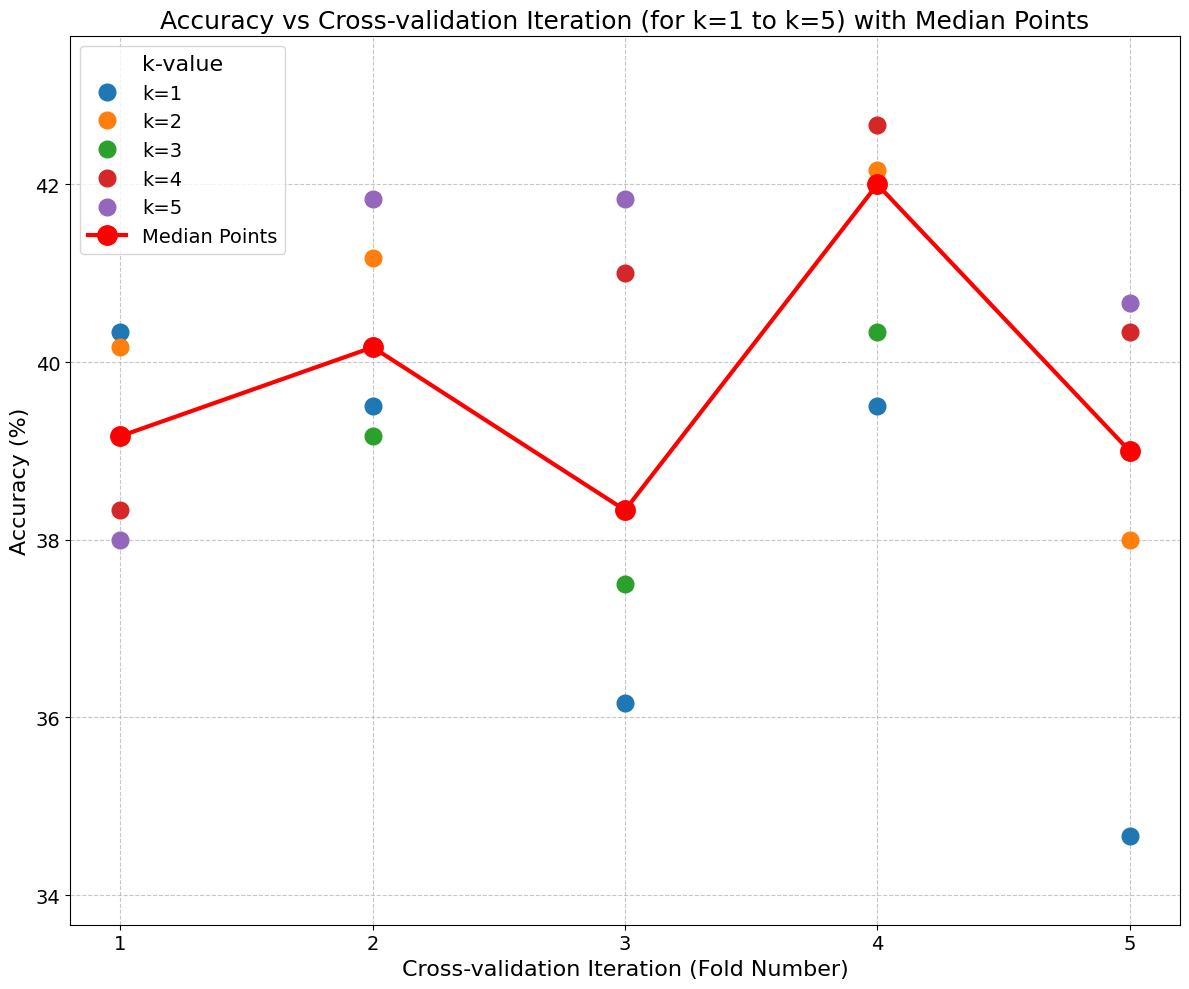

In [35]:
# Assuming 'accuracies' and 'median_points' are already calculated
num_folds = 5

# Plotting the accuracy vs fold iteration for each k value
plt.figure(figsize=(12, 10))

# Plot only the points for each k across the folds, without connecting lines
for k in range(1, 6):
    plt.plot(range(1, num_folds + 1), accuracies[k], marker='o', markersize=12, linestyle='', label=f'k={k}')

# Plot and connect the median points with a single red line
plt.plot(range(1, num_folds + 1), median_points, color='red', marker='o', markersize=14, linestyle='-', linewidth=3, label="Median Points")

# Zoom into the y-axis tightly around the range of accuracy values
min_accuracy = min(min(accuracies[k]) for k in accuracies) - 1
max_accuracy = max(max(accuracies[k]) for k in accuracies) + 1
plt.ylim(min_accuracy, max_accuracy)

# Customize the plot
plt.title('Accuracy vs Cross-validation Iteration (for k=1 to k=5) with Median Points', fontsize=18)
plt.xlabel('Cross-validation Iteration (Fold Number)', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.xticks(range(1, num_folds + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='k-value', fontsize=14, title_fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to ensure the plot is clear and spacious
plt.tight_layout()
plt.show()
